### <font color='blue'>**Bootcamp Projeto Final** 

# *Como segmentar diferentes clientes em diferentes grupos de acordo com sua similaridade*


#### **Alunos** :  *Maxwell Maciel e Vinicius Batista*

## **Table of contents**
* [Introdução: Problema do Negócio](#introduction)
* [Download e Exploração do Dataset](#data)
* [Metodologia](#methodology)
* [Análise](#analysis)
* [Discussão de Resultados](#results)
* [Conclusão](#conclusion)

# 1. Introdução: Problema do Negócio <a name="introduction"></a>

<font color='RED'>DESCREVER O PROBLEMA DO TRABALHO

# 2. Seleção de dados <a name="data"></a>

Para examinar a pesquisa proposta, foi utilizado a seguinte fonte de dados:

*Link*: <font color='red'>https://drive.google.com/file/d/19BOhwz52NUY3dg8XErVYglctpr5sjTy4/view


**Descrição**: Serão aplicados alguns algoritmos sobre o conjunto de dados para verificar em qual deles é gerado uma melhor segmentação.

# 3. Download and Exploração do Dataset

*Vamos importar as bibliotecas*

In [281]:
pip install rogeriopradoj-paretochart 

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import plotly.express as px
import pareto
import warnings


from paretochart.paretochart import pareto
warnings.filterwarnings("ignore")
print('Libraries imported.')

Libraries imported.


### Carregando os dados

In [283]:
df = pd.read_csv("https://raw.githubusercontent.com/MaxRodrigues91/INFNET_FinalProject/main/Mall_Customers.csv")

In [284]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [285]:
# Soltar a coluna "costumer ID"
df.drop('CustomerID', axis = 1, inplace = True) 

In [286]:
#Renomear as colunas para nomes mais condizentes
df = df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'}) 


In [287]:
df.columns = df.columns.str.lower()
df.head(2)

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81


### Exploração dos dados

In [288]:
#Verificar dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [289]:
df.groupby("gender").age.agg('count')

gender
Female    112
Male       88
Name: age, dtype: int64

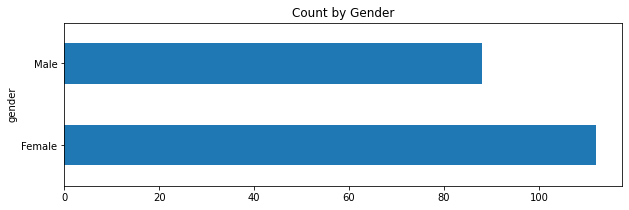

In [290]:
fig,ax=plt.subplots(1,1,figsize=(10,3))
df.groupby("gender").age.agg('count').plot(kind='barh',ax=ax).set_title('Count by Gender')
plt.show()

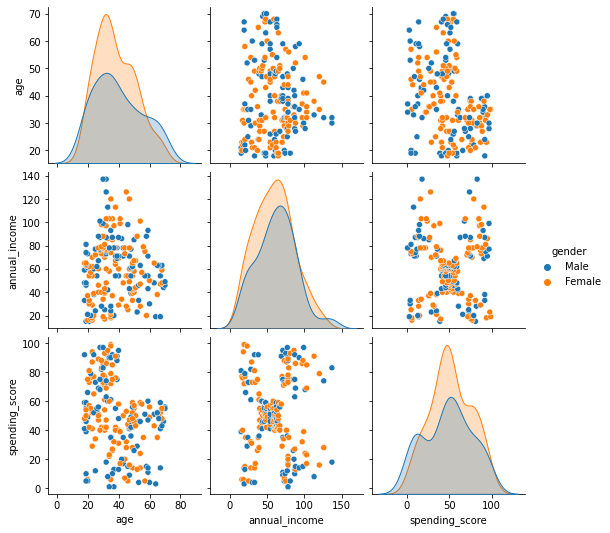

In [291]:
# Verificar a distribuição dos dados por gênero
sns.pairplot(df ,hue="gender")
plt.show()

Como podemos verificar acima, apesar de termos mais dados do gênero feminino, quando olhamos os dados do annual_icome, os valores mais altos são do gênero masculino. As demais correlações como age estão bastante equilibradas. Quando analisamos o spending score, podemos notar que no gênero masculino há uma predominância maior até os 20 anos e após isso há uma concentração maior do gênero feminino entre 20 e 60 anos.

*Transformando a coluna "gender" em uma coluna categórica para utilizarmos em nossa análise.*

In [292]:
# Setting male to 1 and female to 0
df1=pd.get_dummies(df, drop_first=True) 
df1.head(3)

,age,annual_income,spending_score,gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0


In [293]:
df1 = df1.rename(columns={'gender_Male':'gender'}) 
df1.head(3)

,age,annual_income,spending_score,gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0


# 4. Metodologia <a name="methodology"></a>


#### <font color='red'> Para anlisarmos os dados faremos a aplicação dos seguintes algorítimos:  K-means, PCA e HC

#### <font color='red'> INSERIR UM BREVE CONCEITO SOBRE K-MEANS - PCA E O HC
    
    
#### <font color='orange'>   Foi realizada uma pesquisa prévia em estudos científicos sobre os melhores algoritmos para a solução do problema em questão. O k-means apareceu como o principal algoritmo em estudos de segmentação de clientes, tanto se tratando do número de vezes utilizado, como na qualidade dos resultados gerados.
    

Em nossa primeira análise iremos normarlizar os dados e clusterizar com todas as entradas para verficar qual comportamento teremos. 

### **K-MEANS**

**K-means** *é um algoritmo não-hierárquico, ou seja não possui a necessidade de se definir a variável de resposta, permitindo a troca de cluster por alguns elementos durante a sua execução. Divide os dados em k clusters tentando minimizar a soma das distâncias euclidianas de cada elemento com o seu respectivo centróide. O K-means trabalha apenas com dados numérico e se mostra especialmente eficiente ao ser aplicado em datasets médios e grandes. Por se tratar do algoritmo mais recomendado na literatura analisada será o primeiro a ser aplicado.*


## Normalização da base de dados


In [294]:
scal = StandardScaler() # dados normalizados 
temp = scal.fit_transform(df1)
df1_scal = pd.DataFrame(temp,columns=df1.columns, index=df1.index)
df1_scal.head()

,age,annual_income,spending_score,gender
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [295]:
#Aplicando Kmeans
kmeans = KMeans(n_clusters=4, random_state=1).fit(df1_scal.values)
kmeans.labels_
df1_scal['labels'] = kmeans.labels_


## Visualizar todas as dimensões originais

In [296]:
features = df1_scal[['age', 'annual_income', 'spending_score','gender']]
fig = px.scatter_matrix(df1_scal,dimensions=features,color=df1_scal['labels'])
fig.update_traces(diagonal_visible=False)
fig.show()

## 2D PCA Scatter Plot

In [297]:
#aplicação de PCA para visualizar os dados. 
pca = PCA(n_components=2)

X = df1_scal[["age", "annual_income", "spending_score","gender"]]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=1, y=0, color=df1_scal['labels'])
fig.show()

## Visualizar o PCA em 3D

In [298]:
X = df1_scal[["age", "annual_income", "spending_score","gender"]]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df1_scal['labels'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [299]:
#iremos plotar o boxplot para termos uma visualização e análise melhor dos clusters
df['labels'] =  df1_scal['labels']
df.head()

,gender,age,annual_income,spending_score,labels
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0


In [300]:
df.loc[(df['labels'] == 0)]

,gender,age,annual_income,spending_score,labels
2,Female,20,16,6,0
4,Female,31,17,40,0
6,Female,35,18,6,0
12,Female,58,20,15,0
16,Female,35,21,35,0
22,Female,46,25,5,0
24,Female,54,28,14,0
26,Female,45,28,32,0
28,Female,40,29,31,0
34,Female,49,33,14,0


In [301]:
df.loc[(df['labels'] == 1)]

,gender,age,annual_income,spending_score,labels
0,Male,19,15,39,1
1,Male,21,15,81,1
15,Male,22,20,79,1
17,Male,20,21,66,1
21,Male,25,24,73,1
23,Male,31,25,73,1
25,Male,29,28,82,1
27,Male,35,28,61,1
33,Male,18,33,92,1
41,Male,24,38,92,1


In [302]:
df.loc[(df['labels'] == 2)]

,gender,age,annual_income,spending_score,labels
8,Male,64,19,3,2
10,Male,67,19,14,2
14,Male,37,20,13,2
18,Male,52,23,29,2
20,Male,35,24,35,2
30,Male,60,30,4,2
32,Male,53,33,4,2
42,Male,48,39,36,2
53,Male,59,43,60,2
55,Male,47,43,41,2


In [303]:
df.loc[(df['labels'] == 3)]

,gender,age,annual_income,spending_score,labels
3,Female,23,16,77,3
5,Female,22,17,76,3
7,Female,23,18,94,3
9,Female,30,19,72,3
11,Female,35,19,99,3
13,Female,24,20,77,3
19,Female,35,23,98,3
29,Female,23,29,87,3
31,Female,21,30,73,3
35,Female,21,33,81,3


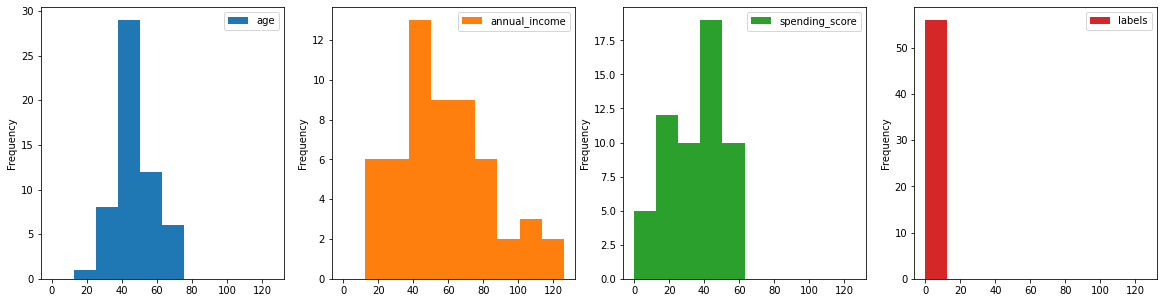

In [305]:
fig,ax = plt.subplots(1,4,figsize=(20, 5))
sdf2 = df.groupby(by="labels")
sdf2.get_group(0).plot(kind='hist',ax=ax, subplots=True, bins=10)
plt.show()

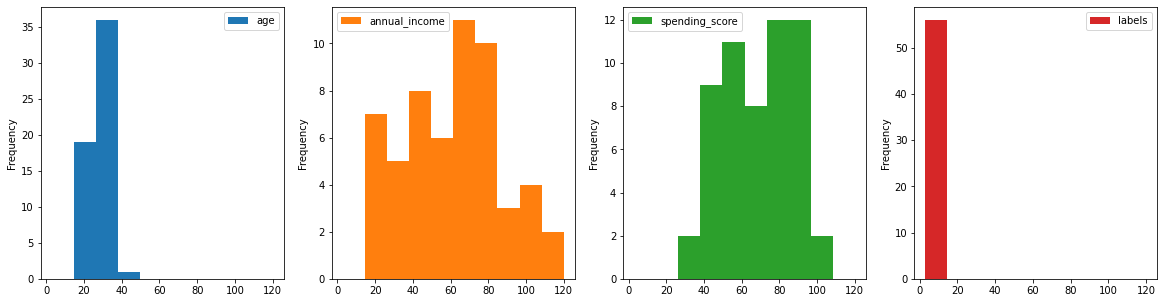

In [306]:
#Análise da distribuição dos clusters
fig,ax = plt.subplots(1,4,figsize=(20, 5))
sdf2 = df.groupby(by="labels")
sdf2.get_group(3).plot(kind='hist',ax=ax, subplots=True, bins=10)
plt.show()

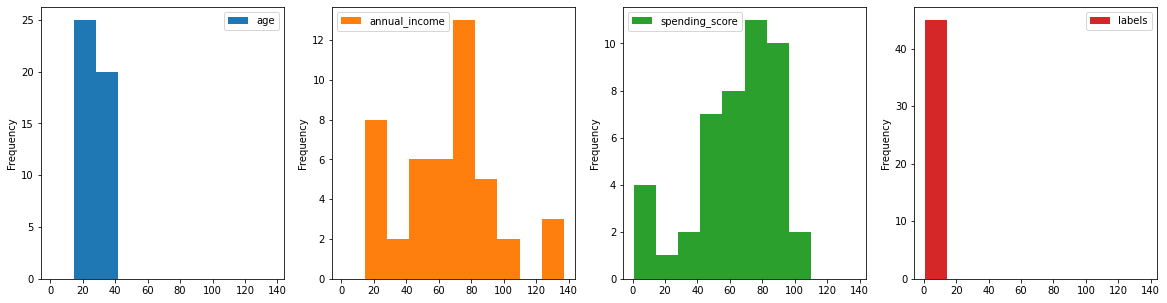

In [307]:
#Análise da distribuição dos clusters
fig,ax = plt.subplots(1,4,figsize=(20, 5))
sdf2 = df.groupby(by="labels")
sdf2.get_group(1).plot(kind='hist',ax=ax, subplots=True, bins=10)
plt.show()

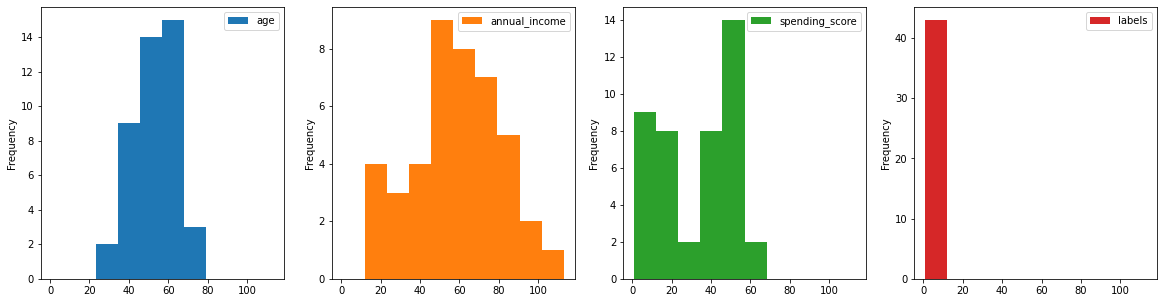

In [308]:
fig,ax = plt.subplots(1,4,figsize=(20, 5))
sdf2 = df.groupby(by="labels")
sdf2.get_group(2).plot(kind='hist',ax=ax, subplots=True, bins=10)
plt.show()

 A clusterização utilizando as 4 dimenções deixa claro que a principal variável na segmentação dos clientes é o gênero seguido pela idade. Não há nenhuma alternância de gênero dentro dos clusters gerados, os clusters 0 e 3 são formados exclusivamente por homens, enquanto o 1 e 2 por mulheres. Além disso, a idade também se mostrou um fator com grande relevância, os clusters 1 e 3 concentram elementos mais jovens, não possuindo nenhum com idade superior a 40 anos. A linha dois pode se tratar de um elemento excepcional, visto que está no cluster 2 que possui a maior média de idade, no entanto está fugindo do padrão com uma idade de 20 anos.

 Os clusters 0 e 2 não possuem nenhum valor acima de 60, além disso o cluster 0 possui uma elevadíssima concentração de valores inferiores a 20. Já o cluster 3 possui altos valores nessa variável, possuindo apenas 4 entradas inferiores a 50, na qual uma delas é inferior a 40 (39). Já o cluster 1 possui apenas 2 entradas inferiores a 40.

### Replicação do processo acima sem o gênero para verificar qual o comportamento dos dados e se haverá uma clusterização melhor 

In [309]:
df2 = df.copy()
df2.drop(['gender','labels'], axis = 1, inplace = True) 
df2.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [310]:
scal = StandardScaler() # dados normalizados 
temp = scal.fit_transform(df2)
df2_scal = pd.DataFrame(temp,columns=df2.columns, index=df2.index)
df2_scal.head()

,age,annual_income,spending_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [311]:
#Aplicando Kmeans
kmeans = KMeans(n_clusters=4, random_state=1).fit(df2_scal.values)
kmeans.labels_
df2_scal['labels'] = kmeans.labels_

## Visualização das dimensões originais sem o gênero

In [312]:
features = df2_scal[['age', 'annual_income', 'spending_score']]
fig = px.scatter_matrix(df2_scal,dimensions=features,color=df2_scal['labels'])
fig.update_traces(diagonal_visible=False)
fig.show()

## Visualização K-Means em 3D sem gênero

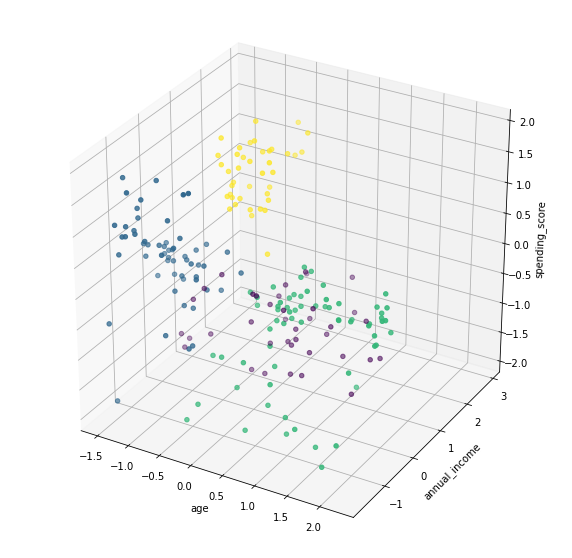

In [313]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d',)

x = df2_scal["age"]
y = df2_scal["annual_income"]
z = df2_scal[ "spending_score"]


ax.set_xlabel("age")
ax.set_ylabel("annual_income")
ax.set_zlabel("spending_score")
ax.legend

ax.scatter(x, y, z,c = df2_scal['labels'])

plt.show()

### APLICANDO KMEANS COM OS DADOS DOIS A DOIS PARA VERIFICAR A FORMA DE CLUSTERIZAÇÃO

In [318]:
df4 = df1_scal.copy()
df4.drop('labels', axis = 1, inplace = True) 
df4.head()

,age,annual_income,spending_score,gender
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


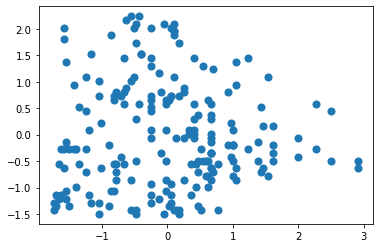

In [319]:
#AGE x ANNUAL INCOME
plt.scatter(df4['annual_income'],df4['age'],  s=50, cmap='viridis')

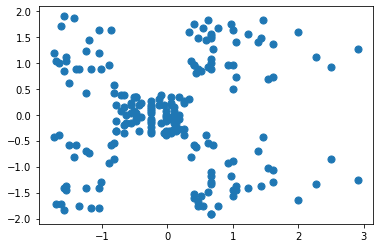

In [320]:
#ANNUAL INCOME x SPENDING SCORE
plt.scatter(df4['annual_income'],df4['spending_score'],  s=50, cmap='viridis')

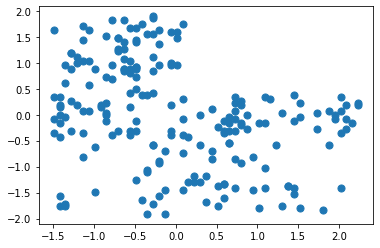

In [321]:
#AGE x SPENDING SCORE
plt.scatter(df4['age'],df4['spending_score'],  s=50, cmap='viridis')

In [322]:
df_age_income= df4[['age','annual_income']] 
df_age_spending= df4[['age','spending_score']] 
df_score_income= df4[['spending_score','annual_income']] 
df_gender_score= df4[['gender','spending_score']]
df_gender_income= df4[['gender','annual_income']]

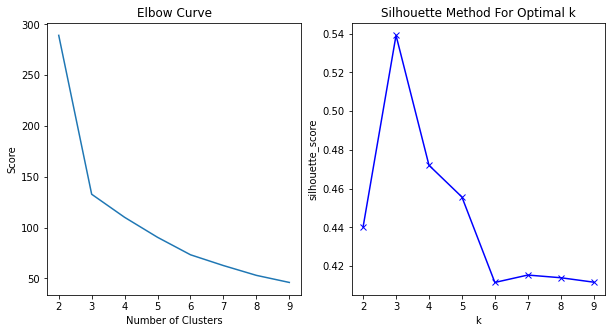

N_cluster: 2, score: 0.4401873313122543
N_cluster: 3, score: 0.5390879200405435
N_cluster: 4, score: 0.47656430519299847
N_cluster: 5, score: 0.45566952484774376
N_cluster: 6, score: 0.4179723710308894
N_cluster: 7, score: 0.42138425656157347
N_cluster: 8, score: 0.4151453283813024
N_cluster: 9, score: 0.4167156357000038


In [324]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_age_income[['age']]
X_axis = df_age_income[['annual_income']]
score = [kmeans[i].fit(df_age_income).inertia_ for i in range(len(kmeans))]

#Visualization
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.plot(K_clusters, score)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Score')
ax1.set_title('Elbow Curve')

sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_age_income)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_age_income, labels, metric = 'euclidean')) 

#Visualization
ax2.plot(K_sil, sil,'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('silhouette_score')
ax2.set_title('Silhouette Method For Optimal k')
plt.show()


for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_age_income)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_age_income,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [325]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(df_age_income)
kmeans.labels_
df_age_income['clusterlabels'] = kmeans.labels_
df_age_income

,age,annual_income,clusterlabels
0,-1.424569,-1.738999,2
1,-1.281035,-1.738999,2
2,-1.352802,-1.700830,2
3,-1.137502,-1.700830,2
4,-0.563369,-1.662660,2
...,...,...,...
195,-0.276302,2.268791,1
196,0.441365,2.497807,1
197,-0.491602,2.497807,1
198,-0.491602,2.917671,1


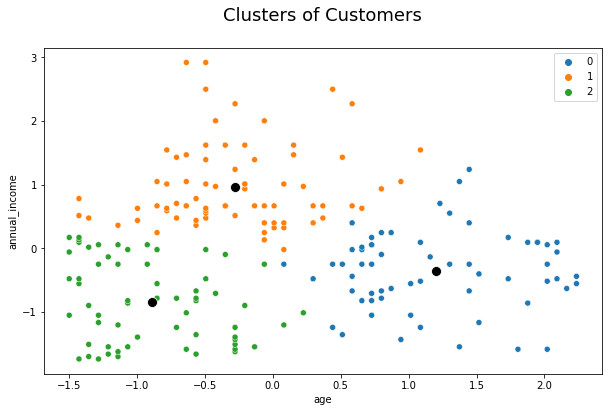

In [326]:
clusterlabels = df_age_income['clusterlabels']
plt.figure(figsize=(10, 6))
sns.scatterplot(df_age_income['age'], df_age_income['annual_income'],hue=clusterlabels,palette=sns.color_palette("tab10",3))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

<font color='red'>INSERIR ANÁLISE 



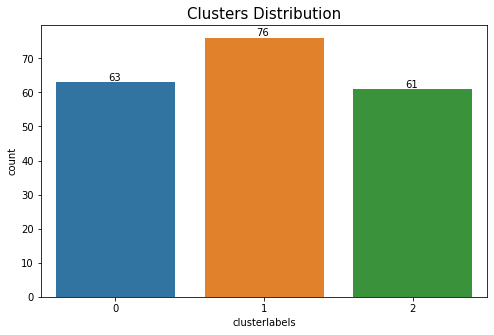

In [327]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_age_income,x='clusterlabels')
for p, label in zip(ax.patches, df_age_income['clusterlabels'].value_counts().sort_index()): 
    ax.annotate(label, (p.get_x()+0.35, p.get_height()+0.50))
plt.title('Clusters Distribution', fontsize = 15)
plt.show()


<font color='red'>INSERIR ANÁLISE 

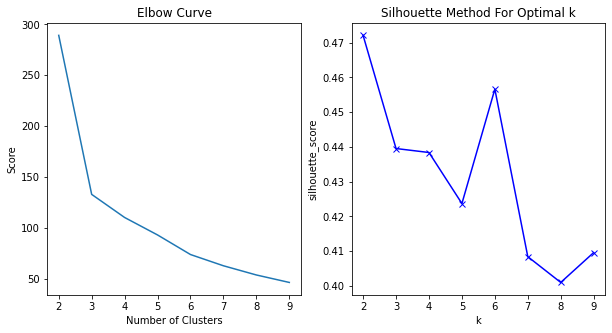

N_cluster: 2, score: 0.4721271643062346
N_cluster: 3, score: 0.43952990002101927
N_cluster: 4, score: 0.43114055026544196
N_cluster: 5, score: 0.42369111306686563
N_cluster: 6, score: 0.4566283030197353
N_cluster: 7, score: 0.40951918040797225
N_cluster: 8, score: 0.40410864204308283
N_cluster: 9, score: 0.40230591536785837


In [328]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = [['age']]
X_axis = df_age_spending[['spending_score']]
score = [kmeans[i].fit(df_age_income).inertia_ for i in range(len(kmeans))]

#Visualization
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.plot(K_clusters, score)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Score')
ax1.set_title('Elbow Curve')

sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_age_spending)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_age_spending, labels, metric = 'euclidean')) 

#Visualization
ax2.plot(K_sil, sil,'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('silhouette_score')
ax2.set_title('Silhouette Method For Optimal k')
plt.show()

for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_age_spending)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_age_spending,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [329]:
kmeans = KMeans(n_clusters=6,random_state=0).fit(df_age_spending)
kmeans.labels_
df_age_spending['clusterlabels'] = kmeans.labels_
df_age_spending

,age,spending_score,clusterlabels
0,-1.424569,-0.434801,1
1,-1.281035,1.195704,3
2,-1.352802,-1.715913,4
3,-1.137502,1.040418,3
4,-0.563369,-0.395980,1
...,...,...,...
195,-0.276302,1.118061,3
196,0.441365,-0.861839,2
197,-0.491602,0.923953,3
198,-0.491602,-1.250054,4


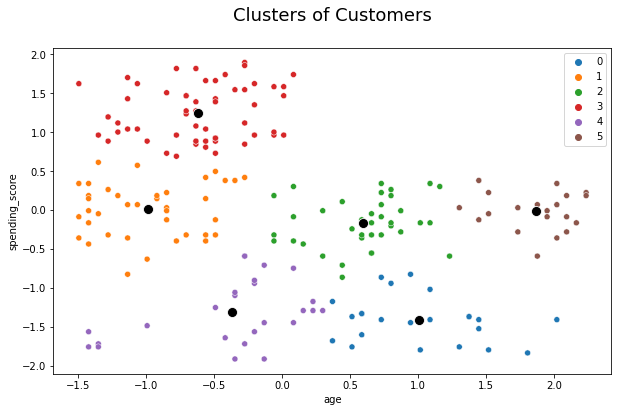

In [330]:
clusterlabels = df_age_spending['clusterlabels']
plt.figure(figsize=(10, 6))
sns.scatterplot(df_age_spending['age'], df_age_spending['spending_score'],hue=clusterlabels,palette=sns.color_palette("tab10",6))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

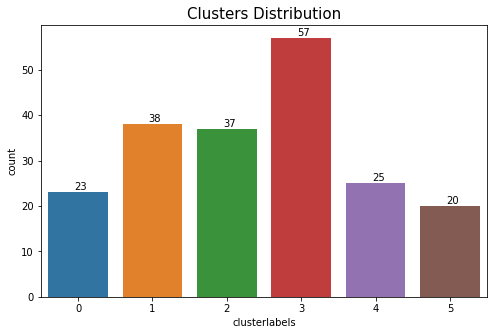

In [331]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_age_spending,x='clusterlabels')
for p, label in zip(ax.patches, df_age_spending['clusterlabels'].value_counts().sort_index()): 
    ax.annotate(label, (p.get_x()+0.35, p.get_height()+0.50))
plt.title('Clusters Distribution', fontsize = 15)
plt.show()

<font color='red'>INSERIR ANÁLISE 

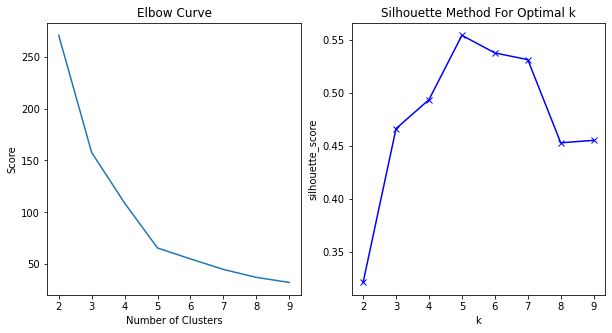

N_cluster: 2, score: 0.29512063001659344
N_cluster: 3, score: 0.46658474419000145
N_cluster: 4, score: 0.4939069237513199
N_cluster: 5, score: 0.5546571631111091
N_cluster: 6, score: 0.5398800926790663
N_cluster: 7, score: 0.5281492781108291
N_cluster: 8, score: 0.4529606224419443
N_cluster: 9, score: 0.4586010456814279


In [332]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_score_income[['spending_score']]
X_axis = df_score_income[['annual_income']]
score = [kmeans[i].fit(df_score_income).inertia_ for i in range(len(kmeans))]

#Visualization
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.plot(K_clusters, score)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Score')
ax1.set_title('Elbow Curve')

sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_score_income)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_score_income, labels, metric = 'euclidean')) 

#Visualization
ax2.plot(K_sil, sil,'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('silhouette_score')
ax2.set_title('Silhouette Method For Optimal k')
plt.show()

for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_score_income)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_score_income,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [334]:
#Aplicando Kmeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_score_income.values)
kmeans.labels_
df_score_income['clusterlabels'] = kmeans.labels_

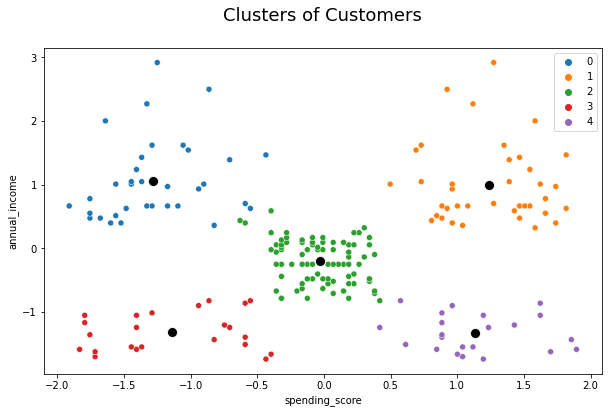

In [335]:
clusterlabels = df_score_income['clusterlabels']
plt.figure(figsize=(10, 6))
sns.scatterplot(df_score_income['spending_score'], df_score_income['annual_income'],hue=clusterlabels,palette=sns.color_palette("tab10",5))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_score_income,x='clusterlabels')
for p, label in zip(ax.patches, df_score_income['clusterlabels'].value_counts().sort_index()): 
    ax.annotate(label, (p.get_x()+0.35, p.get_height()+0.50))
plt.title('Clusters Distribution', fontsize = 15)
plt.show()

<font color='red'>INSERIR ANÁLISE 

## **PCA**


Análise de componente principal(PCA) é um método de redução de dimensionalidade frequentemente usado para reduzir a dimensionalidade de grandes conjuntos de dados, transformando um grande conjunto de variáveis em um menor que ainda contém a maioria das informações do grande original. Reduzir o número de variáveis de um conjunto de dados naturalmente vem às custas da precisão, assim o objetivo é ter uma baixa redução na precisão para gerar um grande aumento na simplicidade e praticidade da análise.


In [338]:
df_pca = df1.copy()
df_pca.head()


,age,annual_income,spending_score,gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


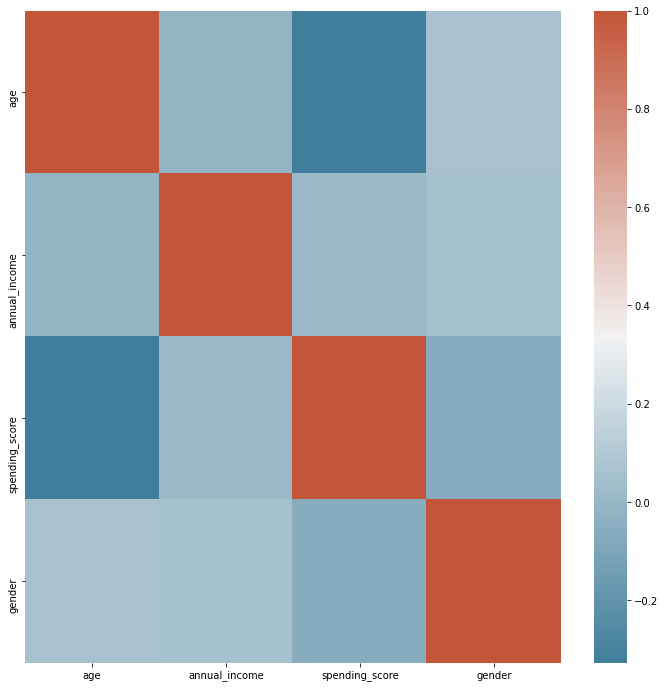

In [339]:
scaled_data = pd.DataFrame(StandardScaler().fit_transform(df_pca), columns=df_pca.columns, index=df_pca.index)

corr = scaled_data.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(corr, cmap=cmap, ax=ax)
plt.show()

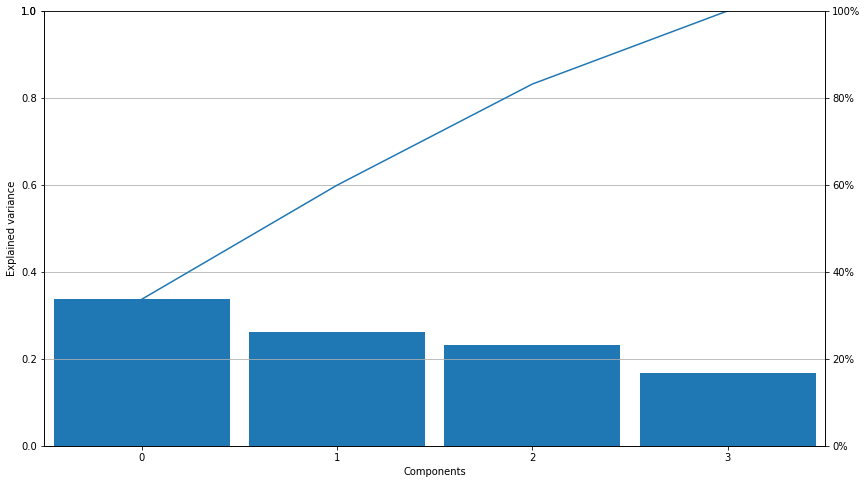

In [340]:
pca = PCA(n_components=4)
pca.fit(scaled_data)
fig, ax = plt.subplots(figsize=(14, 8))
pareto(pca.explained_variance_ratio_)
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance')
plt.grid()


In [341]:
np.round(pca.explained_variance_ratio_.cumsum(),2)

array([0.34, 0.6 , 0.83, 1.  ])

In [343]:
pca = PCA(n_components=2) 
df_pca1 = pd.DataFrame(pca.fit_transform(scaled_data), index=scaled_data.index, columns=['PC1', 'PC2'])
df_pca1.head()

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483


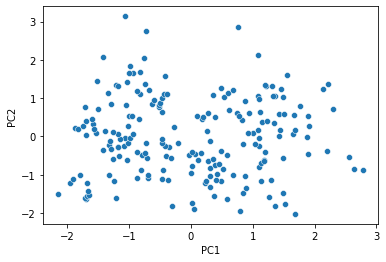

In [344]:
sns.scatterplot(data=df_pca1, x= 'PC1',y='PC2')
plt.show()

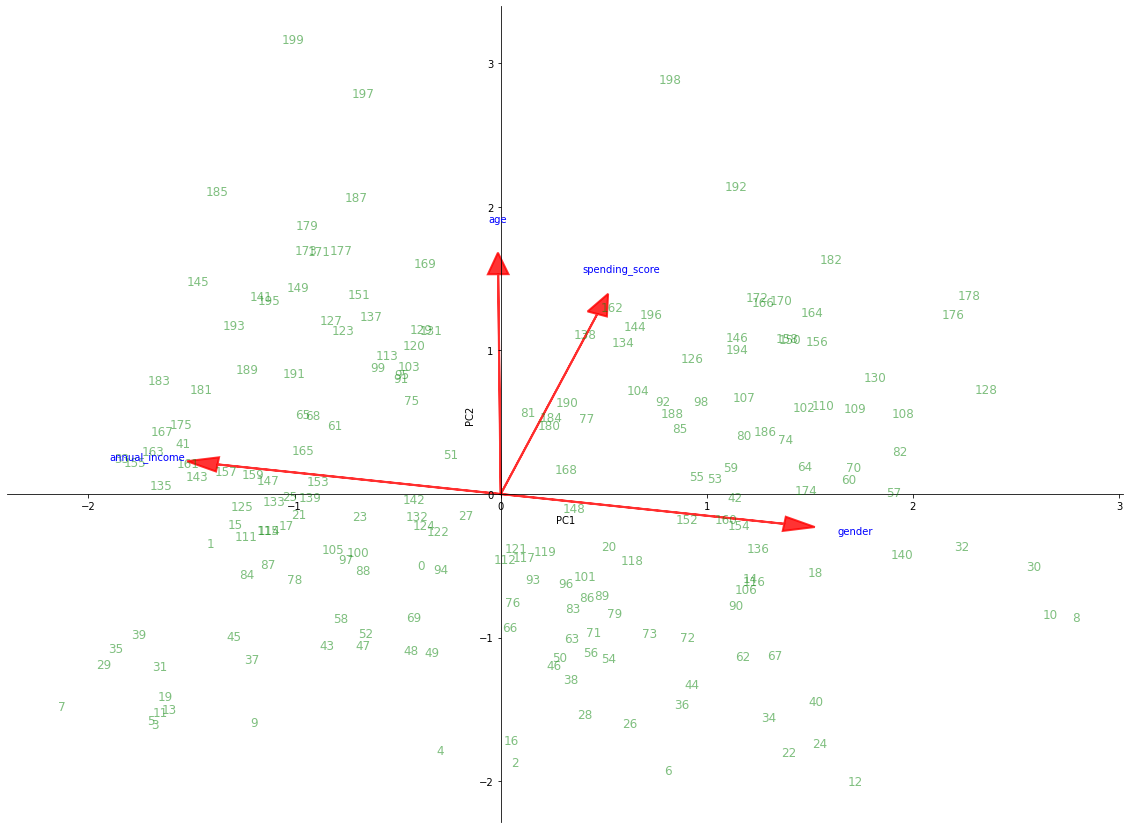

In [345]:
def plot_components(coeff, ax,labels=None):
  for i in range(coeff.shape[0]):
        ax.arrow(0, 0, coeff[i,0]* 2, coeff[i,1]* 2, color = 'r',alpha = 0.8, lw=2, head_width=.1)
        if labels is None:
            ax.text(coeff[i,0]* 2.5, coeff[i,1] * 2.5, "Var"+str(i+1), color = 'b', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 2.5, coeff[i,1] * 2.5, labels[i], color = 'b', ha = 'center', va = 'center')


fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

df_pca2 = pd.DataFrame(pca.fit_transform(scaled_data), index=df.index, columns=['PC1', 'PC2'])

sns.scatterplot(data=df_pca2, x="PC1", y="PC2", alpha=0)

for idx in range(df_pca2.shape[0]):
  ax.text(x=df_pca2.PC1[idx],y=df_pca2.PC2[idx],s=df_pca2.index[idx], 
          fontdict=dict(color='g', size=12), alpha=.5)

plot_components(pca.components_.T, ax, labels=df.columns)


<font color='red'>***INSERIR RESUMO DE PCA***

Componente zero gender e anual_income

## **HC**
INSERIR INDRODUÇÃO DE HC

In [346]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data_t= min_max_scaler.fit_transform(df1)
data_t[0:5]

array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 0.        ]])

In [347]:
from sklearn.metrics.pairwise import pairwise_distances
dist_matrix = pairwise_distances(data_t,data_t) 
print(dist_matrix)

[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


In [350]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

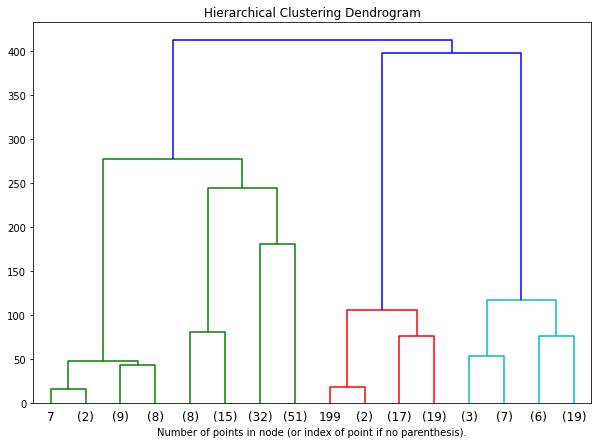

In [351]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df1)
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Verificar código acima